<a href="https://colab.research.google.com/github/Abderrahmane-Br/Hybrid-model-for-time-series-forecasting/blob/CNN-LSTM/LSTM_CNN(lstm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [248]:
# elect_data = pd.read_csv("/content/BrentSpotPrice.csv", index_col="Date")
# elect_data = pd.read_csv("/content/Electric_Production.csv", index_col="DATE")
# elect_data = pd.read_csv("/content/MedicineData.csv", index_col="date")
# elect_data = pd.read_csv("/content/YearlySunspots.csv", usecols=["time", "value"], index_col="time", parse_dates=True)
elect_data = pd.read_csv("/content/daily-total-female-births-CA.csv", index_col="date")
elect_data.index = pd.to_datetime(elect_data.index)
print(elect_data)

            births
date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]


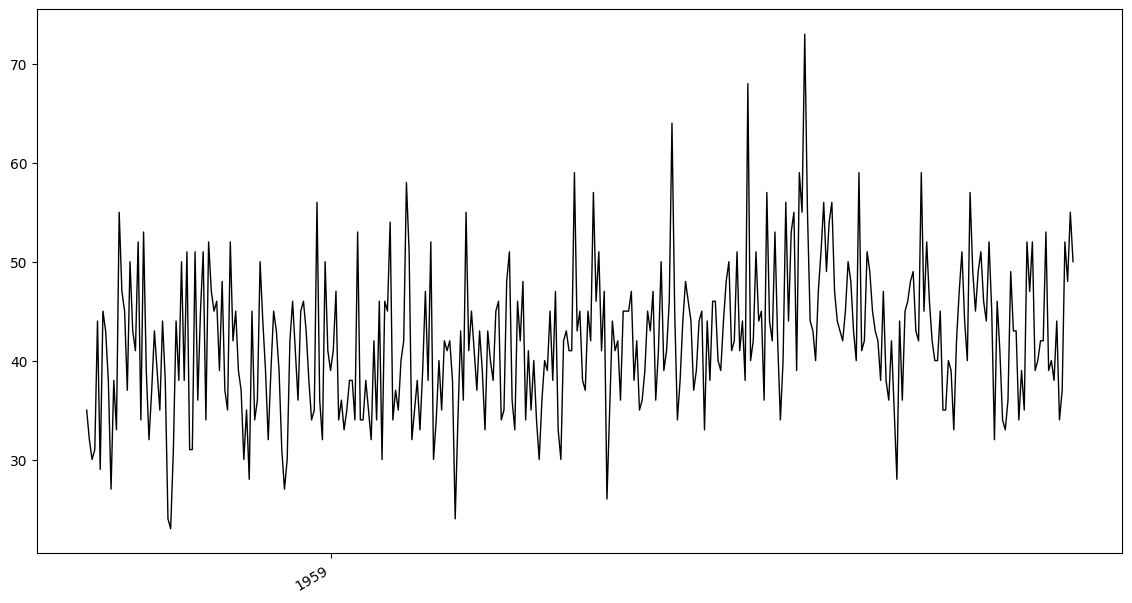

In [249]:
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = [14, 8]
loc = mdates.MonthLocator(4)
min_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_minor_locator(min_loc)
ax.tick_params(colors="black")
plt.xticks(rotation=45)
fig.autofmt_xdate()

ax.plot(elect_data,'-', color="black", linewidth=1)
# plt.savefig('../test1.png', dpi=300)

In [250]:
class CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()

        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, input):
        out, (hidden, cell) = self.lstm(input.view(len(input), 1))
        out = self.linear(out
        
        )
        return out

In [251]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(elect_data)
train_scaled = scaler.transform(elect_data)
print(type(train_scaled))
split_point = int(len(train_scaled) * 0.7)
# inputs = torch.tensor(elect_data["Brent Spot Price"], dtype=torch.float32)
train_set = torch.tensor(train_scaled[:split_point], dtype=torch.float32)
test_set = torch.tensor(train_scaled[split_point:], dtype=torch.float32)

<class 'numpy.ndarray'>


In [252]:
model = CNN_LSTM(1, 40, 2)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)
loss_fun = nn.MSELoss()
epochs = 250

In [253]:
for epoch in range(epochs): 
    out = model(train_set)
    loss = loss_fun(out, train_set)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0: 
        print(loss)

tensor(0.0922, grad_fn=<MseLossBackward0>)
tensor(0.0316, grad_fn=<MseLossBackward0>)
tensor(0.0210, grad_fn=<MseLossBackward0>)
tensor(0.0204, grad_fn=<MseLossBackward0>)
tensor(0.0198, grad_fn=<MseLossBackward0>)
tensor(0.0194, grad_fn=<MseLossBackward0>)
tensor(0.0190, grad_fn=<MseLossBackward0>)
tensor(0.0185, grad_fn=<MseLossBackward0>)
tensor(0.0173, grad_fn=<MseLossBackward0>)
tensor(0.0150, grad_fn=<MseLossBackward0>)
tensor(0.0104, grad_fn=<MseLossBackward0>)
tensor(0.0016, grad_fn=<MseLossBackward0>)
tensor(0.0039, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
tensor(0.0008, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(9.9834e-05, grad_fn=<MseLossBackward0>)
tensor(8.5174e-05, grad_fn=<MseLossBackward0>)
tensor(7.4194e-05, grad_fn=<MseLossBackward0>)

In [254]:
test_out = model(test_set).detach()
print(loss_fun(test_out, test_set))

tensor(8.2974e-05)


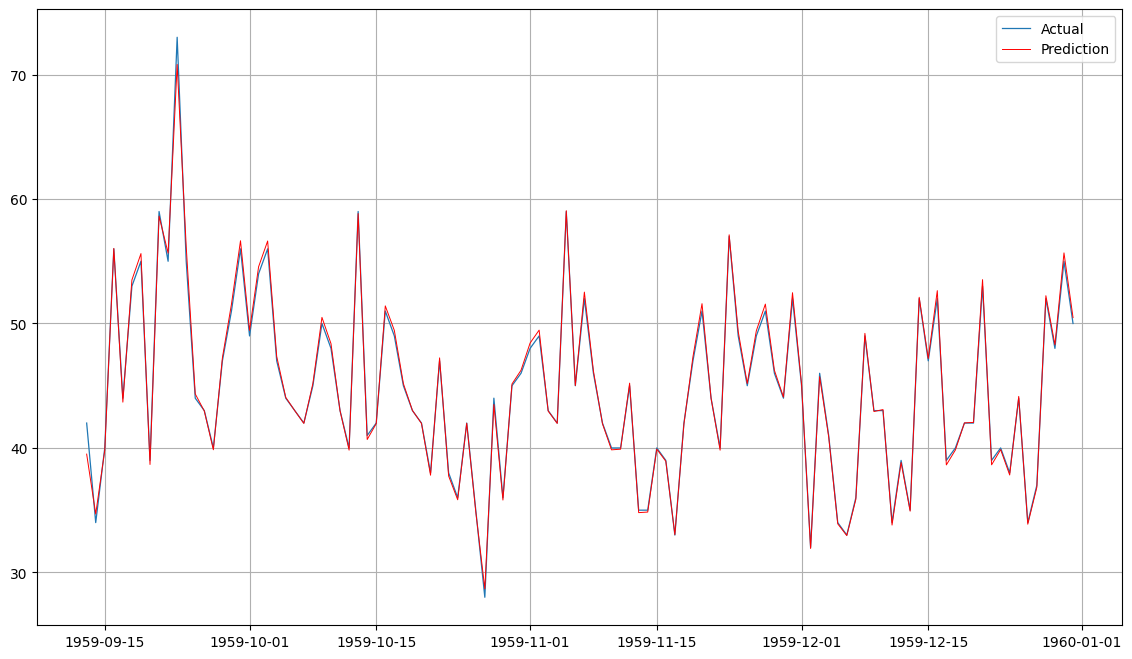

In [255]:
train_set_np = np.array(train_set)
test_out = np.array(test_out)
# results = scaler.inverse_transform(np.concatenate((train_set_np, test_out)))
results = scaler.inverse_transform(test_out)
plt.plot(elect_data[split_point:], linewidth=0.9)
results_df = pd.DataFrame(data = results, index=elect_data.index[split_point:])
# print(results_df)
plt.grid(True)
plt.plot(results_df, color="red", linewidth=0.7)
plt.legend(["Actual", "Prediction"])